# Выполнение операций над массивами и таблицами с помощью модуля `Scipy`

Как и `Pandas`, `Scipy` основан на библиотеке `NumPy`, что оставляет возможность работать с элементами последовательностей, как с массивами. При этом, появляются новые функции, расширяющие возможности взаимодействия с этим типом данных. Нас будут интересовать операции фильтрации, интерполяции и другие, позволяющие извлечь больше информации из имеющихся данных.

Начнём, разумеется, с импорта
~~~puthon
import scipy
~~~
Одновременно с нужной нам библиотекой получаем и `NumPy`, поэтому ограничимся одной строкой

## Специальные функции scipy.special

Модуль включает большое количество математических функций, работа которых оптимизирована под массивы `NumPy`, приведём несколько из них (полный список https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special):

* `special.radian(degree, minutes, seconds)` - переводит меры углов из градусов в радианы. Все 3 аргумента обязательны
* `exp2(power)`, `exp10(power)` - возводят 2 и 10 в указанную степень
* `round(float)` - округляет число к ближайшему целому
* `sindg(degree)`, `cosdg(degree)` - вычисление тригонометрии от углов

In [14]:
from scipy import special
import math

print(special.radian(90, 0, 0), '==',math.pi/2)
print(special.exp2(4), '==', 2.**4)
print(special.round(2.5), '==', round(2.5))
print(special.sindg(45), '==', math.sin(math.pi/4))
print(special.cosdg(135), '==', math.cos(3*math.pi/4))

1.5707963267948966 == 1.5707963267948966
16.0 == 16.0
2.0 == 2
0.7071067811865476 == 0.7071067811865476
-0.7071067811865476 == -0.7071067811865475


Основные преимущества в использовании данных функций в быстродействии и возможности применения к массивам

In [23]:
import numpy as np

mas = np.array(((1, 2, 3), (4, 5, 6)))
print('Массив:', mas, sep='\n', end='\n\n')
print('Применение функции 1:', special.exp2(mas), sep='\n', end='\n\n')
print('Применение функции 2:', special.sindg(mas), sep='\n', end='\n\n')

Массив:
[[1 2 3]
 [4 5 6]]

Применение функции 1:
[[ 2.  4.  8.]
 [16. 32. 64.]]

Применение функции 2:
[[0.01745241 0.0348995  0.05233596]
 [0.06975647 0.08715574 0.10452846]]



## Интегрирование scipy.integrate

Здесь же упомянем об интегрировании: 
* `scipy.integrate.quad(func, a, b, complex_func=False)` - взятие определённого интеграла от `a` до `b`
* `scipy.integrate.dblquad(func, a, b, c, d, complex_func=False)` - взятие двойного определённого интеграла от `a` до `b` по первой переменной, от `c` до `d` по второй

In [33]:
from scipy import integrate

func_1 = lambda x: x**2
print('Результат,', 'Погрешность расчёта')
print(integrate.quad(func_1, 1, 10), end='\n\n')

func_2 = lambda x, y: x * y ** 2
c = lambda y: 2
d = lambda y: 5
print('Результат,\t   ', 'Погрешность расчёта')
print(integrate.dblquad(func_2, 1, 10, c, d))

Результат, Погрешность расчёта
(333.0, 3.697042672001771e-12)

Результат,	    Погрешность расчёта
(3496.500000000001, 3.881894805601861e-11)


Доступны и другие методы, такие как: `tplquad` и `nquad` 

## Оптимизация scipy.optimize

Библиотека предоставляет ряд функций, облегчающему поиск минимального значения, лучшего совпадения, линии тренда и подобным операциям оптимизации значений. Мы уделим внимание только нескольким из них

### curve_fit

Позволяет подбирать коэффициенты в переданном уравенении, для подгонки к массивам данных. Полезна для получения функции по дискретным точкам на основе ожидаемой зависимости. Из ожидаемых аргументов, выделим следующие:<br>
- func - функция, которую подгоняем под данные
- x_data - массив значение первой оси
- y_data - массив значений второй оси
- p0 - массив начальных значений параметров
- bounds - массив кортежей с диапазоном допустимых значений для каждого параметра
- method - используемый метод из `‘lm’, ‘trf’, ‘dogbox’`

Обязательными являются только первые 3

Пусть ожидаемая функция имеет вид параболы, причём первую ось передаём первым аргументом:

In [27]:
parabola = lambda x, a: a*x**2

Создадим массив значений, который примерно соответствует такой функции - для оси `y` сгенерируем с погрешностью 12.5%

In [69]:
from random import random
import numpy as np

parameter  = 4.2

x = np.linspace(-10, 10, 21)
y = np.array([parabola(x[i], parameter)*(1 - ((random()-0.5)/4)) for i in range(len(x))])
print('x =', x)
print('y =', y)

x = [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
y = [380.36722876 373.56216518 281.34340936 194.83991142 155.87792386
 103.32893545  73.7353873   34.11506265  18.27166629   3.90879097
   0.           4.62177793  17.72174169  40.39274193  61.18054864
 104.08808835 169.47607041 221.47325127 266.03622003 355.04092477
 388.12502419]


Для наглядности воспользуемся графичиским представлением(подробнее обсудим на следующей лекции)

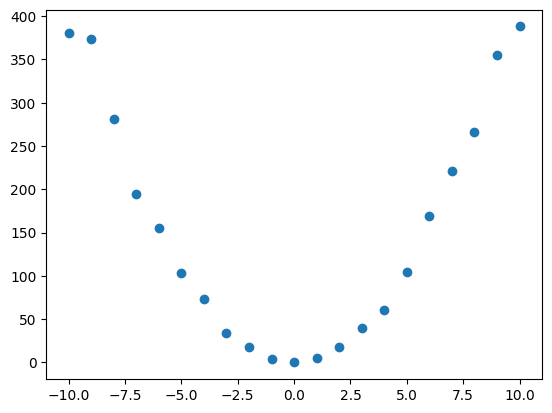

In [70]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

Теперь применим функцию `curve_fit` для поиска введённого в генерацию параметра

In [75]:
from scipy.optimize import curve_fit

fitted = curve_fit(parabola, x, y)
print(float(fitted[0][0]), '\nParameter =', parameter)

4.216849661168494 
Parameter = 4.2


Первый элемент результата работы функции - массив ожидаемых значений параметров. Осталось отстроить и сравнить:

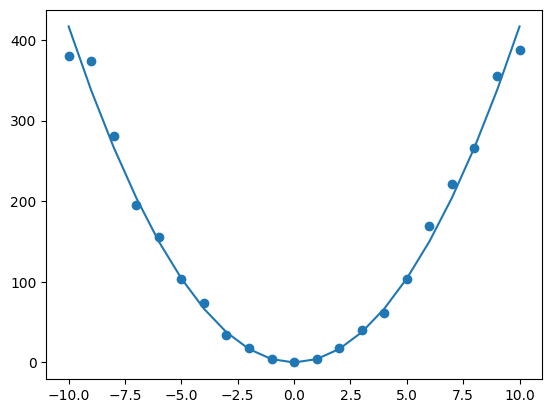

In [72]:
plt.scatter(x, y)
plt.plot(x, [parabola(i, fitted[0][0]) for i in x])
plt.show()

Визуальное совпадение есть с некоторой ошибкой, что является ожидаемой проблемой, ведь сами данные получены с разбросом в более чем 10%. Попробуем повысить точность расчёта с помощью большего числа точек

In [73]:
x = np.linspace(-10, 10, 201)
y = np.array([parabola(x[i], 4.2)*(1 - ((random()-0.5)/4)) for i in range(len(x))])

fitted = curve_fit(parabola, x, y, (4,), bounds=(1, 5))
print(float(fitted[0][0]), '\nParameter =', parameter)

4.216849661465757 
Parameter = 4.2


Очевидно, что такой ход резко повысил точность. Если ограничить возможные значения, то увидим это:

In [74]:
fitted = curve_fit(parabola, x, y, (4,), bounds=(1, 4))
print(float(fitted[0][0]), '\nParameter =', parameter)

3.9999999999999996 
Parameter = 4.2


Функция попыталась подобрать коэффициент, но упёрлась в выставленное ограничение. Это может помочь при подборе серии параметров со схожими ролями в функции

### minimize

Функция упрощает алгоритм поиска минимального значения для некоторой функции. Рассмотрим пример: Пусть есть некоторый закон, по которому изменяется некоторая величина, но не известны параметры в уравнении. Запишем в виде отдельной функции

In [3]:
from scipy.special import exp10

def func(params):
    a, b, c = params
    return a * 16 - b + exp10(c)

print(func([1, 2, 4]))

10014.0


Посмотрим результат применения к ней минимизации
~~~python
scipy.optimize.minimize(func, params0, args=(), method='nelder-mead', bounds=[], disp=False)
~~~
* <i>func</i> - оптимизируемая функция
* <i>params0</i> - контейнер начальных значений оптимизуруемых параметров
* <i>args</i> - кортеж дополнительных аргументов для функции 
* <i>method</i>- метод минимизации, подробнее https://habr.com/ru/articles/439288/ 
* <i>bounds</i> - список кортежей минимальных и макимальных значений параметров
* <i>disp</i> - отображение информации о циклах оптимизации 

In [5]:
from scipy.optimize import minimize

result = minimize(func, [1, 2, 3])
result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -544875336.8689586
        x: [-3.392e+07  2.120e+06 -2.318e+05]
      nit: 3
      jac: [ 1.600e+01 -8.000e+00  0.000e+00]
 hess_inv: [[-7.750e+07  4.844e+06 -5.295e+05]
            [ 4.844e+06 -3.027e+05  3.310e+04]
            [-5.295e+05  3.310e+04 -3.618e+03]]
     nfev: 908
     njev: 224

Строка `success: False` намекает на неудачную попытку, что не удевительно - наша функция не имеет глобального минимума. Попробуем написать функцию с его наличием

In [15]:
from scipy.special import exp10

def func_2(params):
    a, b = params
    return exp10(a) * b ** 2

result = minimize(func_2, [1, 2])
print(result, '\n')
print('Минимальное значение:', func_2(result.x))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.1868712327499162e-12
        x: [ 5.579e-01  5.731e-07]
      nit: 6
      jac: [ 2.733e-12  4.196e-06]
 hess_inv: [[ 3.167e-02 -5.120e-02]
            [-5.120e-02  1.377e-01]]
     nfev: 33
     njev: 11 

Минимальное значение: 1.1868712327499162e-12


Теперь получилось найти значения параметров, при которых функция практически равняется 0, что и является истинным глобальным минимумом. Выводом функции является словарь, по которому удобно получать информацию. Под ключом `x` как раз записаны требуемые параметры<br>
Можем сравнить результат с другим методом минимизации

In [29]:
result = minimize(func_2, [1, 2], method='powell')
print(result, '\n')
print('Минимальное значение:', func_2(result.x))

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.0
       x: [-5.114e+02  2.000e+00]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 40 

Минимальное значение: 0.0


Давайте вернёмся к первой функции и ограничить диапазон параметров ключём `bouns`

In [31]:
result = minimize(func, [1, 2, 3], bounds=[(0, 10), (0, 10), (-1, 0)])
print(result, '\n')
print('Минимальное значение:', func(result.x))

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -9.9
        x: [ 0.000e+00  1.000e+01 -1.000e+00]
      nit: 2
      jac: [ 1.600e+01 -1.000e+00  2.303e-01]
     nfev: 20
     njev: 5
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64> 

Минимальное значение: -9.9


Теперь смогли получить искомый минимум, причём все 3 параметра приняли крайние значения

Передача аргументов может быть полезна для больших функций и осуществляется заполнением кортежа под ключевым аргументом `args`, к примеру:

In [28]:
def func_3(params, append1):
    a, b = params
    return exp10(a) * b ** 2 + append1

result = minimize(func_3, [1, 2], args=(2,))
print(result, '\n')
print('Минимальное значение:', func_3(result.x, 2))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.0000000000011813
        x: [ 5.579e-01  5.718e-07]
      nit: 6
      jac: [ 0.000e+00  4.202e-06]
 hess_inv: [[ 3.167e-02 -5.120e-02]
            [-5.120e-02  1.377e-01]]
     nfev: 33
     njev: 11 

Минимальное значение: 2.0000000000011813


### minimize_scalar

При необходимости найти локальный минимум для функции с одним параметром, можно воспользоваться схожей функцией `minimize_scalar(func, params0, method, bounds, bracket)`<br>
* <i>func</i> - оптимизируемая функция
* <i>params0</i> - контейнер начальных значений оптимизуруемых параметров
* <i>method</i> - выбор метода - ограниченный(`bounded`) или без границ(`brent`)
* <i>bounds</i> - интервал для поиска значения параметра
* <i>bracket</i> - Начальные условия поиска минимума (a, b, c) такие что func(a) > func(b) < func(c)

In [55]:
from scipy.optimize import minimize_scalar

def func_4(a):
    return 4 * a ** 2 + 7

result = minimize_scalar(func_4, bracket=(-10, -2, 10), method='brent')
print(result, '\n')
print('Минимальное значение:', func_4(result.x), '\n\n')

result = minimize_scalar(func_4,  bracket=(-5, -2, 3), method='bounded', bounds=(3, 40))
print(result, '\n')
print('Минимальное значение:', func_4(result.x))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 7.0
       x: 9.675017563959337e-09
     nit: 39
    nfev: 42 

Минимальное значение: 7.0 


 message: Solution found.
 success: True
  status: 0
     fun: 43.000101241290736
       x: 3.000004218384148
     nit: 33
    nfev: 33 

Минимальное значение: 43.000101241290736


## Интерполяция scipy.interpolate

Генерирует промежуточные значения, что повышает чёткость и гладкость массивов. Сеществуют несколько методов интерполяции для каждой из размерностей пространства, сосредоточимася на одномерной и двумерной.<br>
Её применение является упрощённым вариантом `curve_fit`

### interp1d

- x - массив первой оси
- y - массив второй оси, по которой производится интерполяция
- kind - способ замещения отсутствующих значений(“zero”, “slinear”, “quadratic”, “cubic”, “previous”, “next”, “nearest”, “nearest-up”)
- assume_sorted - является ли массив x отсортированным. При значении `False` они будут выстроены в монотонно возрастающем порядке


Начнём с получения данных в одном пространстве. Зададим точки некоторой функцией

x = [-4.  -3.2 -2.4 -1.6 -0.8  0.   0.8  1.6  2.4  3.2  4. ]
y = [ 3.02720998  0.23349657 -2.70185272 -3.99829441 -2.86942436  0.
  2.86942436  3.99829441  2.70185272 -0.23349657 -3.02720998]


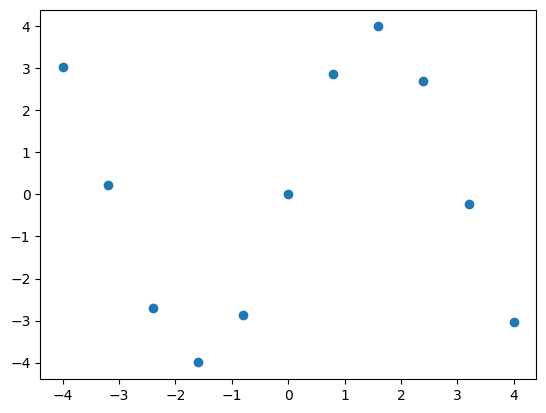

In [96]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 11)
y = 4*np.sin(x)
print('x =', x)
print('y =', y)

plt.scatter(x, y)
plt.show()

Теперь передадим массивы в функцию интерполяции

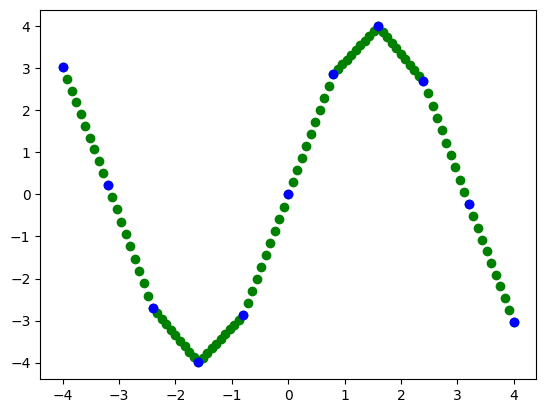

In [101]:
from scipy.interpolate import interp1d

interpol = interp1d(x, y, assume_sorted=False)

x_new = np.linspace(-4, 4, 101)
y_new = interpol(x_new)
plt.scatter(x_new, y_new, color='green')

plt.scatter(x, y, color='blue')

plt.show()

Имеем промежуточные значения, заполненные линейными участками. Изменим вид зависимотси

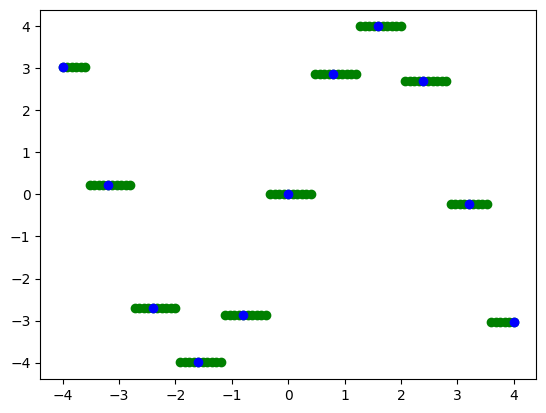

In [105]:
interpol = interp1d(x, y, kind='nearest', assume_sorted=True)

y_new = interpol(x_new)
plt.scatter(x_new, y_new, color='green')

plt.scatter(x, y, color='blue')

plt.show()

В случае взятия значения ближайшей точки, вид такой, попробуем кубическую подгонку

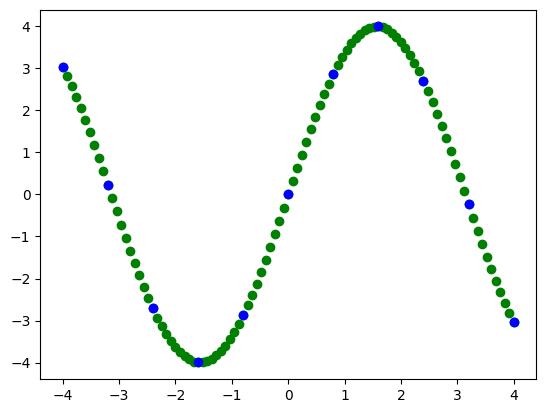

In [106]:
interpol = interp1d(x, y, kind='cubic', assume_sorted=True)

y_new = interpol(x_new)
plt.scatter(x_new, y_new, color='green')

plt.scatter(x, y, color='blue')

plt.show()

### interpn

В многомерном пространстве приеняется функция `interpn(points, values, point, method...)`, в которую передаются массивы известных координат, их значений и координаты искомой точки. При необходимости задаётся метод поиска (“linear”, “nearest” или “splinef2d”).<br>
Рассмотрим пример с 4-х мерной функцией:

In [17]:
import numpy as np
from scipy.interpolate import interpn

def func(x, y, z):
    return pow(x, 2) * y - z

x = np.linspace(0, 5, 11)
y = np.linspace(0, 5, 11)
z = np.linspace(0, 5, 11)

points = (x, y, z)
grid = np.meshgrid(x, y, z, indexing='ij')
values = func(grid[0], grid[1], grid[2])

print(interpn(points, values, (1.2, 4.8, 0.1))[0])
print('Истинное значние:', func(1.2, 4.8, 0.1))

7.1
Истинное значние: 6.812


Из-за линейности алгоритма, значение заметно отличается от расчитанного, поэтому для лучшей точности вместо интерполяции нужно использовать линии тренда